## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### Dynamic Programming

In [1]:
original_price=[1,5,8,9,10,17,17,20,24,30]

In [2]:
from collections import defaultdict

In [3]:
price=defaultdict(int)

In [4]:
for i,p in enumerate(original_price):
    price[i+1]=p

In [5]:
price[11]

0

#### Get the max splitting by enumerate

In [6]:
def r(n):
    return max(
        [price[n]] + [r(i)+r(n-i) for i in range(1,n)]
    )


In [7]:
r(15)

43

In [8]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [9]:
def some_function_1(): print('I am function 1')

In [10]:
get_call_times(some_function_1)

I am function 1
function: some_function_1 called once! 


In [11]:
called_time

defaultdict(int, {'some_function_1': 1})

In [12]:
call_time_with_arg = defaultdict(int)

In [13]:
def r(n):
    #fname = r.__name__
    #call_time_with_arg[(fname, n)] += 1
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [14]:
del call_time_with_arg

In [15]:
from functools import wraps

In [16]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
       # print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [17]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [18]:
add_twenty = get_call_time(add_twenty)

In [19]:
add_twenty(9)

29

#### store the computed process into memory to save time 

In [20]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [21]:
called_time_with_arg = defaultdict(int)
solution = {}
memo.already_computed = {}

#@get_call_time
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price


In [22]:
r(38)

112

In [23]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2)}

In [24]:

def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [25]:
r(234)

700

In [26]:

parse_solution(234)

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 2,
 2]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implement the gradient descent code.

In [27]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
data = load_boston()
X, y = data['data'], data['target']
X.shape, y.shape

((506, 13), (506,))

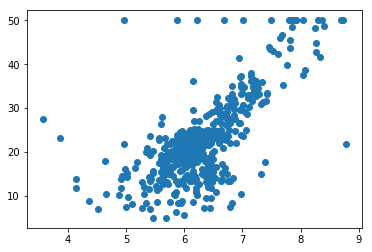

In [29]:
x = X[:, 5]
plt.scatter(x, y)

In [30]:
def mean_absolute_error(y, y_hat):
    return np.abs(y - y_hat).sum() / y.size
def get_y_hat(k, b, x):
    return k * x + b

In [31]:
def fit(x, y, it=1000, lr=0.001):
    current_k = current_b = np.random.random()
    for i in range(it):
        y_hat = get_y_hat(current_k, current_b, x)
        loss = mean_absolute_error(y, y_hat)
        if (i+1) % 1000 == 0:
            print('iter {it} times, current k is {k} current b is {b} loss is {l}'.format(it=i, k=current_k, b=current_b, l=loss))
        y_diff_sign = np.sign(y_hat - y)
        current_k -= lr * (y_diff_sign * x).sum() / y.size
        current_b -= lr * y_diff_sign.sum() / y.size
    return current_k, current_b

In [32]:
best_k, best_b = fit(x, y, 5000, 0.1)

iter 999 times, current k is 4.077744760615524 current b is -3.479367294720472 loss is 5.265934164086303
iter 1999 times, current k is 4.715485076821029 current b is -7.387272433060489 loss is 5.109198314091416
iter 2999 times, current k is 5.29021788314515 current b is -10.912568875748075 loss is 4.981499593324499
iter 3999 times, current k is 5.817889029390295 current b is -14.136284290767922 loss is 4.874754115886292
iter 4999 times, current k is 6.298426183540517 current b is -17.07541472555065 loss is 4.7861125745194135


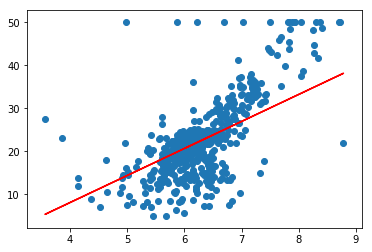

In [33]:
y_hat = get_y_hat(best_k, best_b, x)
plt.plot(x, y_hat, color='r');
plt.scatter(x, y);

iter 999 times, current k is 3.4057517872394314 current b is 0.6428087931682258 loss is 5.448595844874266
iter 999 times, current k is 3.9838745130902535 current b is -2.9313656647753596 loss is 5.288715741645973
iter 999 times, current k is 4.690544444769774 current b is -7.364208519657062 loss is 5.111715182019692
iter 999 times, current k is 6.175027202652583 current b is -8.957795919876995 loss is 8.660464207813593
iter 999 times, current k is 3.424127785792689 current b is 0.5373133095080439 loss is 5.443700360676193
iter 1999 times, current k is 3.4609443865831704 current b is 0.31221449527878076 loss is 5.433295380880773
iter 999 times, current k is 4.044252065898809 current b is -3.2827267285676074 loss is 5.274106643656698
iter 1999 times, current k is 4.620917639021415 current b is -6.82580973252016 loss is 5.130914238490874
iter 999 times, current k is 4.681586643051193 current b is -7.365427981454693 loss is 5.1135976030583565
iter 1999 times, current k is 5.835868856489829

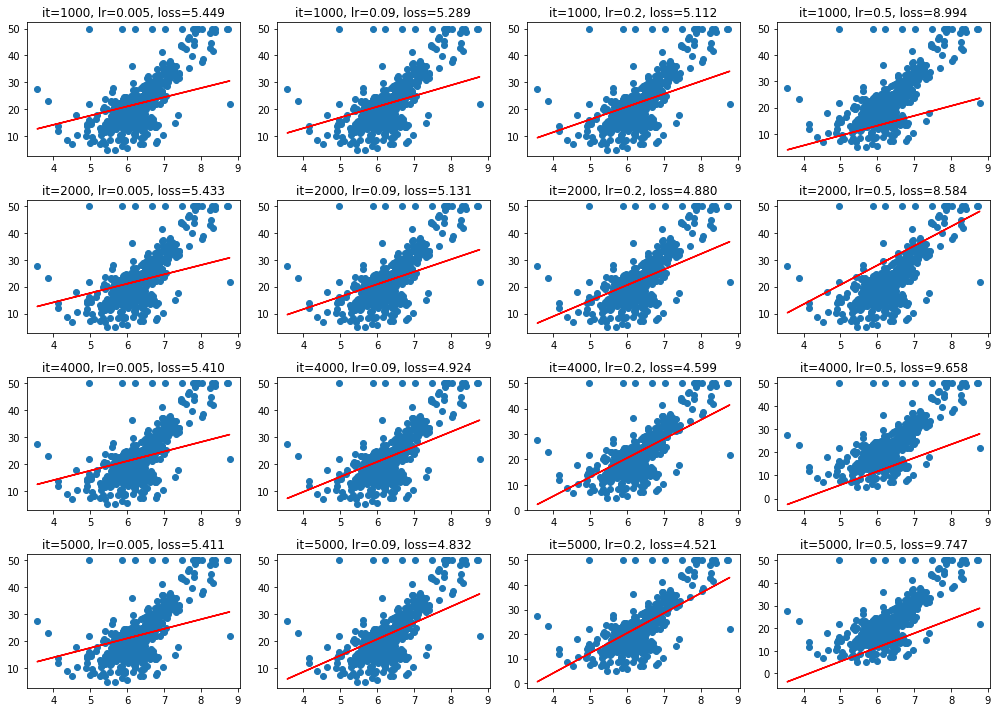

In [34]:
params = [(it, lr) for it in [1000, 2000, 4000, 5000] for lr in [0.005, 0.09, 0.2, 0.5]]
fig, axs = plt.subplots(4, 4, figsize=(14, 10))
for ax, (it, lr) in zip(axs.flatten(), params):
    k, b = fit(x, y, it=it, lr=lr)
    y_hat = get_y_hat(k, b, x)
    loss = mean_absolute_error(y, y_hat)
    title = "it={it}, lr={lr}, loss={loss:.3f}".format(it=it, lr=lr, loss=loss)
    ax.set_title(title)
    ax.scatter(x, y);
    ax.plot(x, y_hat, color='red');
fig.tight_layout()

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [35]:
from functools import lru_cache

In [36]:
solution = {}

In [37]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [38]:
string1='ABCDE'
string2='ABCCEF'

In [39]:
edit_distance(string1,string2)

2

In [40]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [41]:

def parse_solutions(solution: dict, string1: str, string2: str) -> str:
    route = []
    def helper(solution: dict, string1: str, string2: str) -> None:
        if not string1 and not string2: return
        operation = solution[(string1, string2)]
        route.append('{k}: {v}'.format(k=(string1, string2), v=operation))
        if operation.startswith('SUB') or operation == '':
            helper(solution, string1[:-1], string2[:-1])
        elif operation.startswith('ADD'):
            helper(solution, string1, string2[:-1])
        elif operation.startswith('DEL'):
            helper(solution, string1[:-1], string2)
    helper(solution, string1, string2)
    return '->'.join(route)

In [42]:
parse_solutions(solution, string1, string2)

"('ABCDE', 'ABCCEF'): ADD F->('ABCDE', 'ABCCE'): ->('ABCD', 'ABCC'): SUB D => C->('ABC', 'ABC'): ->('AB', 'AB'): ->('A', 'A'): "

In [43]:
string1='beijing'
string2='biejia'

In [44]:
edit_distance(string1,string2)
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F',
 ('b', 'b'): '',
 ('b', 'bi'): 'ADD i',
 ('b', 'bie'): 'ADD e',
 ('b', 'biej'): 'ADD j',
 ('b', 'bieji'): 'ADD i',
 ('b', 'biejia'): 'ADD a',
 ('be', 'b'): 'DEL e',
 ('be', 'bi'): 'SUB e => i',
 ('be', 'bie'): '',
 ('be'

In [45]:
parse_solutions(solution, string1, string2)

"('beijing', 'biejia'): DEL g->('beijin', 'biejia'): SUB n => a->('beiji', 'bieji'): ->('beij', 'biej'): ->('bei', 'bie'): DEL i->('be', 'bie'): ->('b', 'bi'): ADD i->('b', 'b'): "

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:Because gradient clear the direction of target function increases，this also means we can know which direction the target function decreases largest，then by gradient decent, we could decrease the target function by every step.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:"Gradient" means the direction of target function increases fastest. And the "Descent" means use the negative gradient to find the decearsing direction for minimizing the target function.


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:If the learning rate for gradient descent is too fast, you are going to skip the true local minimum to optimize for time. If it is too slow, the gradient descent may never converge because it is trying really hard to exactly find a local minimum. 

The learning rate can affect which minimum you reach and how quickly you reach it, as shown below. A good practice is to have a changing learning rate, that slows down as your error starts to decrease. 

4. Using the simple words to describe: What's the machine leanring.¶

Ans:Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: Dynamic programming is used for solving multi-stage optimal desicion problem，for this problem, it has several fuatures:optimal sub-structure,overlapping subproblem and parse solution；if we do not make use of these fueatures and directly use greedy search，the complexity of algorithms will be very high and low effciency. 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: The different input and outputs in one same dynamic programming have no common reflection relation.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: Shortest path problem, Edit distance problem, Cutting problem

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: machine translation, spelling correction, speech recognization

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:分析子问题的重复性,子问题进行存储,Solution 要进行解析

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: No united solution for different problems; when the dimension of data is very high, the space complexity will be high.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [46]:
import random
import matplotlib.pylab as plt

In [47]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

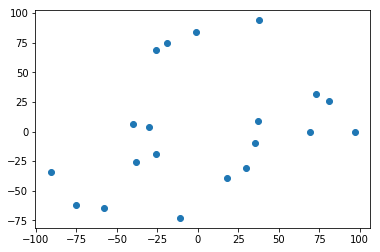

In [48]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [49]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [50]:
import matplotlib.pyplot as plt

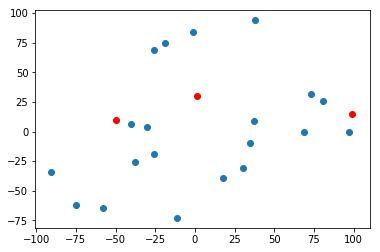

In [51]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro